# MNIST Dimensionality Reduction and Visualization

## Purpose
This notebook demonstrates the application of various dimensionality reduction techniques on the MNIST dataset, followed by visualization of the results. It aims to compare the effectiveness of t-SNE, PCA, and UMAP in clustering the MNIST digits.

## Dependencies
- Python 3.x
- numpy
- scikit-learn
- matplotlib
- umap-learn

## Data
- MNIST dataset (mnist_784) from scikit-learn's datasets

## Main Steps
1. Load and preprocess the MNIST dataset
   - Fetch the MNIST dataset
   - Normalize the data using StandardScaler

2. Apply dimensionality reduction techniques
   - t-SNE (assumed to be implemented)
   - PCA
   - UMAP

3. Visualize the results
   - Create scatter plots for each technique
   - Color-code points by digit class
   - Display legends and titles

## Functions
- `plot_clusters(X, y, title)`: Generates a scatter plot of the reduced data

## Output
Three scatter plots showing the 2D representations of the MNIST dataset:
- t-SNE clustering
- PCA clustering
- UMAP clustering

## Notes
- Ensure all required libraries are installed
- The t-SNE implementation is explained step by step in mnist_problem notebook
- Adjust plot parameters as needed for clarity and aesthetics

In [19]:
'''
importing all the required libraries for the project
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
%matplotlib inline

In [2]:
'''
 Load MNIST dataset from scikit-learn's datasets
'''
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

In [3]:
print (y)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [4]:
'''
Normalize the data using StandardScaler
'''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# t-SNE -- be patient, it may take some time... Remember, t-SNE has a complexity of O(n^2) plus we are using the whole dataset. In the previous notebook we used only part of the data.
tsne = manifold.TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [7]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [17]:
# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/opt/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


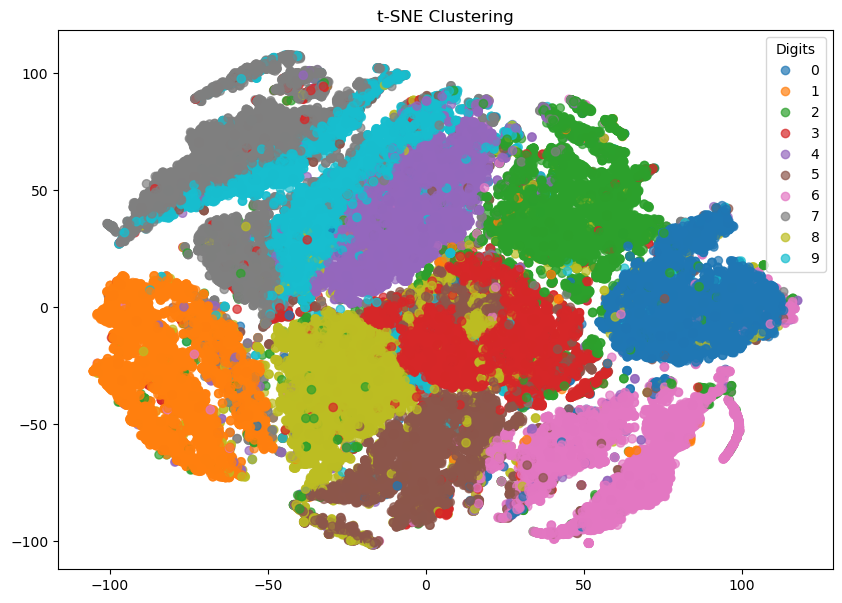

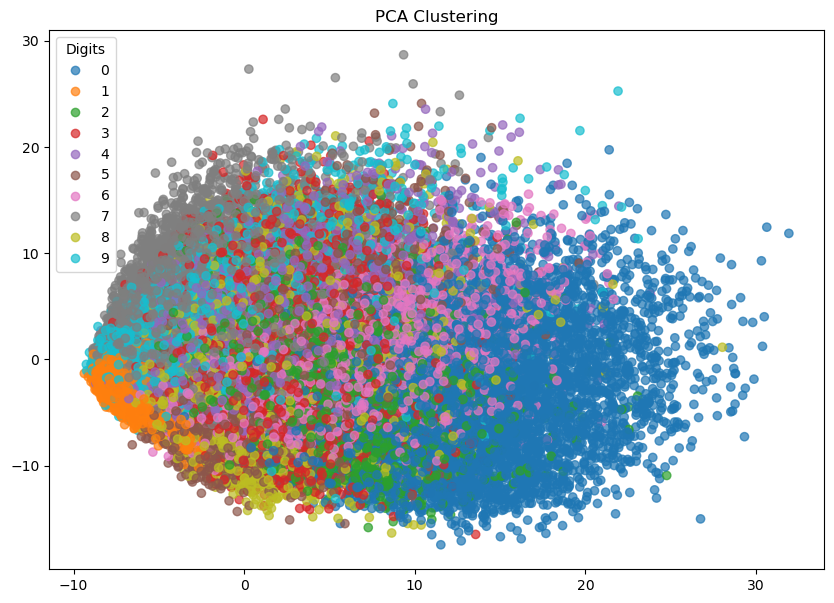

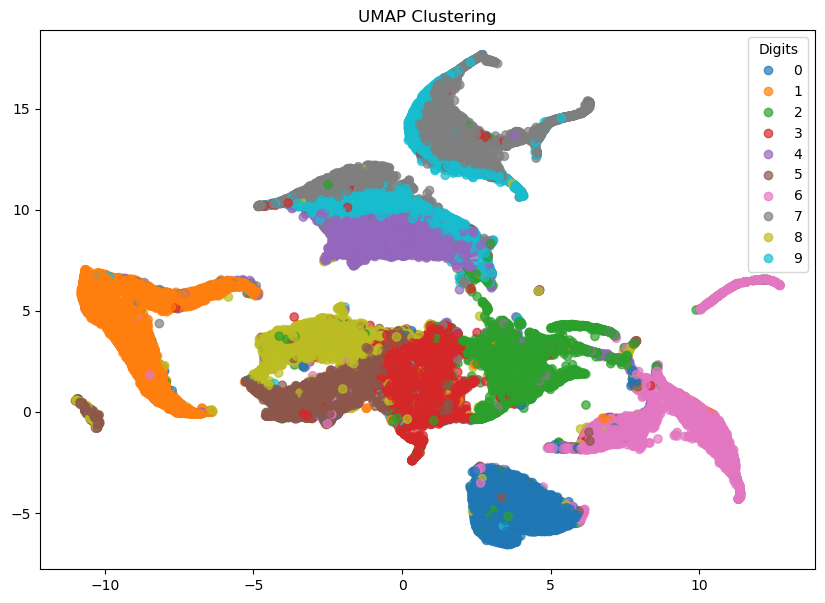

In [18]:
# "y" values (labels) are in categorical format. We need to convert them to numeric for visualization purposes.
y_numeric = y.astype(int)

def plot_clusters(X, y, title):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

plot_clusters(X_tsne, y_numeric, "t-SNE Clustering")

plot_clusters(X_pca, y_numeric, "PCA Clustering")

plot_clusters(X_umap, y_numeric, "UMAP Clustering")